The input data consists of hyperspectral bands over a single landscape in Indiana, US, (Indian Pines data set) with 145×145 pixels. For each pixel, the data set contains 220 spectral reflectance bands which represent different portions of the electromagnetic spectrum in the wavelength range 0.4–2.5 10^(-6) meters

In [ ]:
import numpy as np

In [ ]:
arr=np.array([1,2,3,4,5,6,7])
arr

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
arr.shape

(7,)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
                             confusion_matrix, classification_report)

import tensorflow as tf

from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)

In [ ]:
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('/content/drive/MyDrive/Salinas/Salinas_corrected.mat')

# Print the variable names in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'salinas_corrected'])


In [ ]:
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('/content/drive/MyDrive/Salinas/Salinas_gt.mat')

# Print the variable names in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'salinas_gt'])


## Load Data

In [ ]:
data = loadmat('/content/drive/MyDrive/Salinas/Salinas_corrected.mat')['salinas_corrected']

gt = loadmat('/content/drive/MyDrive/Salinas/Salinas_gt.mat')['salinas_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands: {data.shape[-1]}')
# print(f'Data Shape2: {data.shape[1]}\nNumber of Bands: {data.shape[-1]}')
print(f'gt Shape: {gt.shape[:-1]}')

Data Shape: (512, 217)
Number of Bands: 204
gt Shape: (512,)


In [ ]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1],-1))#Calculates Total number of elements int the orignal data , often used to flatten or reshape a multi-dimensional array into a one-dimensional array.
#-1 in the reshape function is a placeholder that indicates that the number of columns should be automatically determined based on the total number of elements calculated in the previous step.
df.shape

(111104, 204)

In [ ]:
df.columns = ['band' + str(i) for i in range(1, df.shape[-1] + 1)]
df['class'] = gt.ravel() #to convert 2d array to 1d array

In [ ]:
df.head()#values displayed are the spectral values corresponding to the bands

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0    290    381    585   1041   1316   1397   1319   1462   1643    1683  ...   
1    290    381    519   1041   1316   1352   1319   1462   1643    1683  ...   
2    290    381    585   1041   1286   1352   1300   1412   1614    1644  ...   
3    290    381    585    999   1316   1374   1280   1380   1584    1631  ...   
4    219    381    585    999   1286   1352   1261   1396   1555    1618  ...   

   band196  band197  band198  band199  band200  band201  band202  band203  \
0       96      109       93       54       79       54       36       11   
1       94      111       96       56       83       56       36       11   
2       88      107       89       54       81       54       30       11   
3       86      105       85       56       75       50       30       11   
4       83      105       83       48       75       50       24        9   

   band204  class  
0       17      0  
1       15      0  
2       11      0  
3       19      0  
4       17      0  

[5 rows x 205 columns]

## Data Visualization

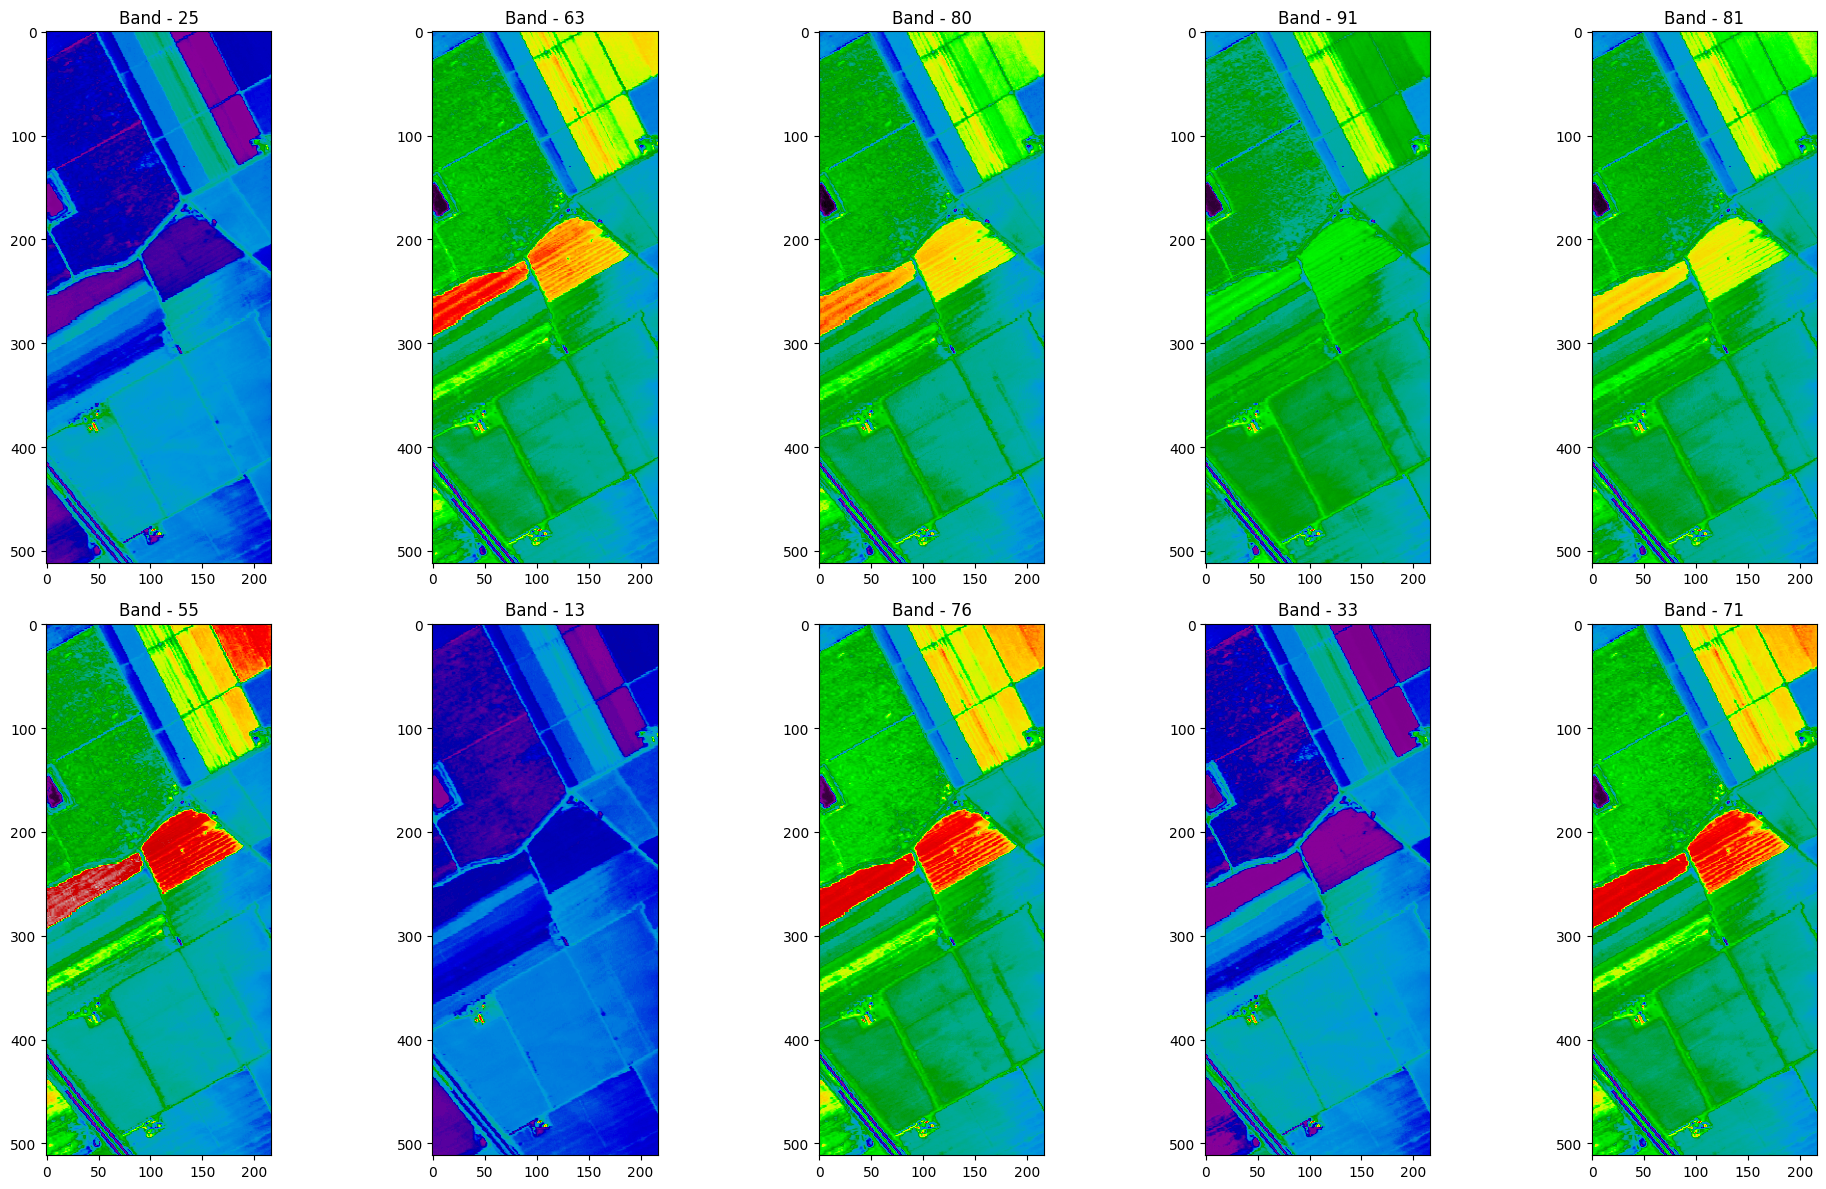

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('on')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()# Call tight_layout to adjust the spacing between subplots
plt.show()

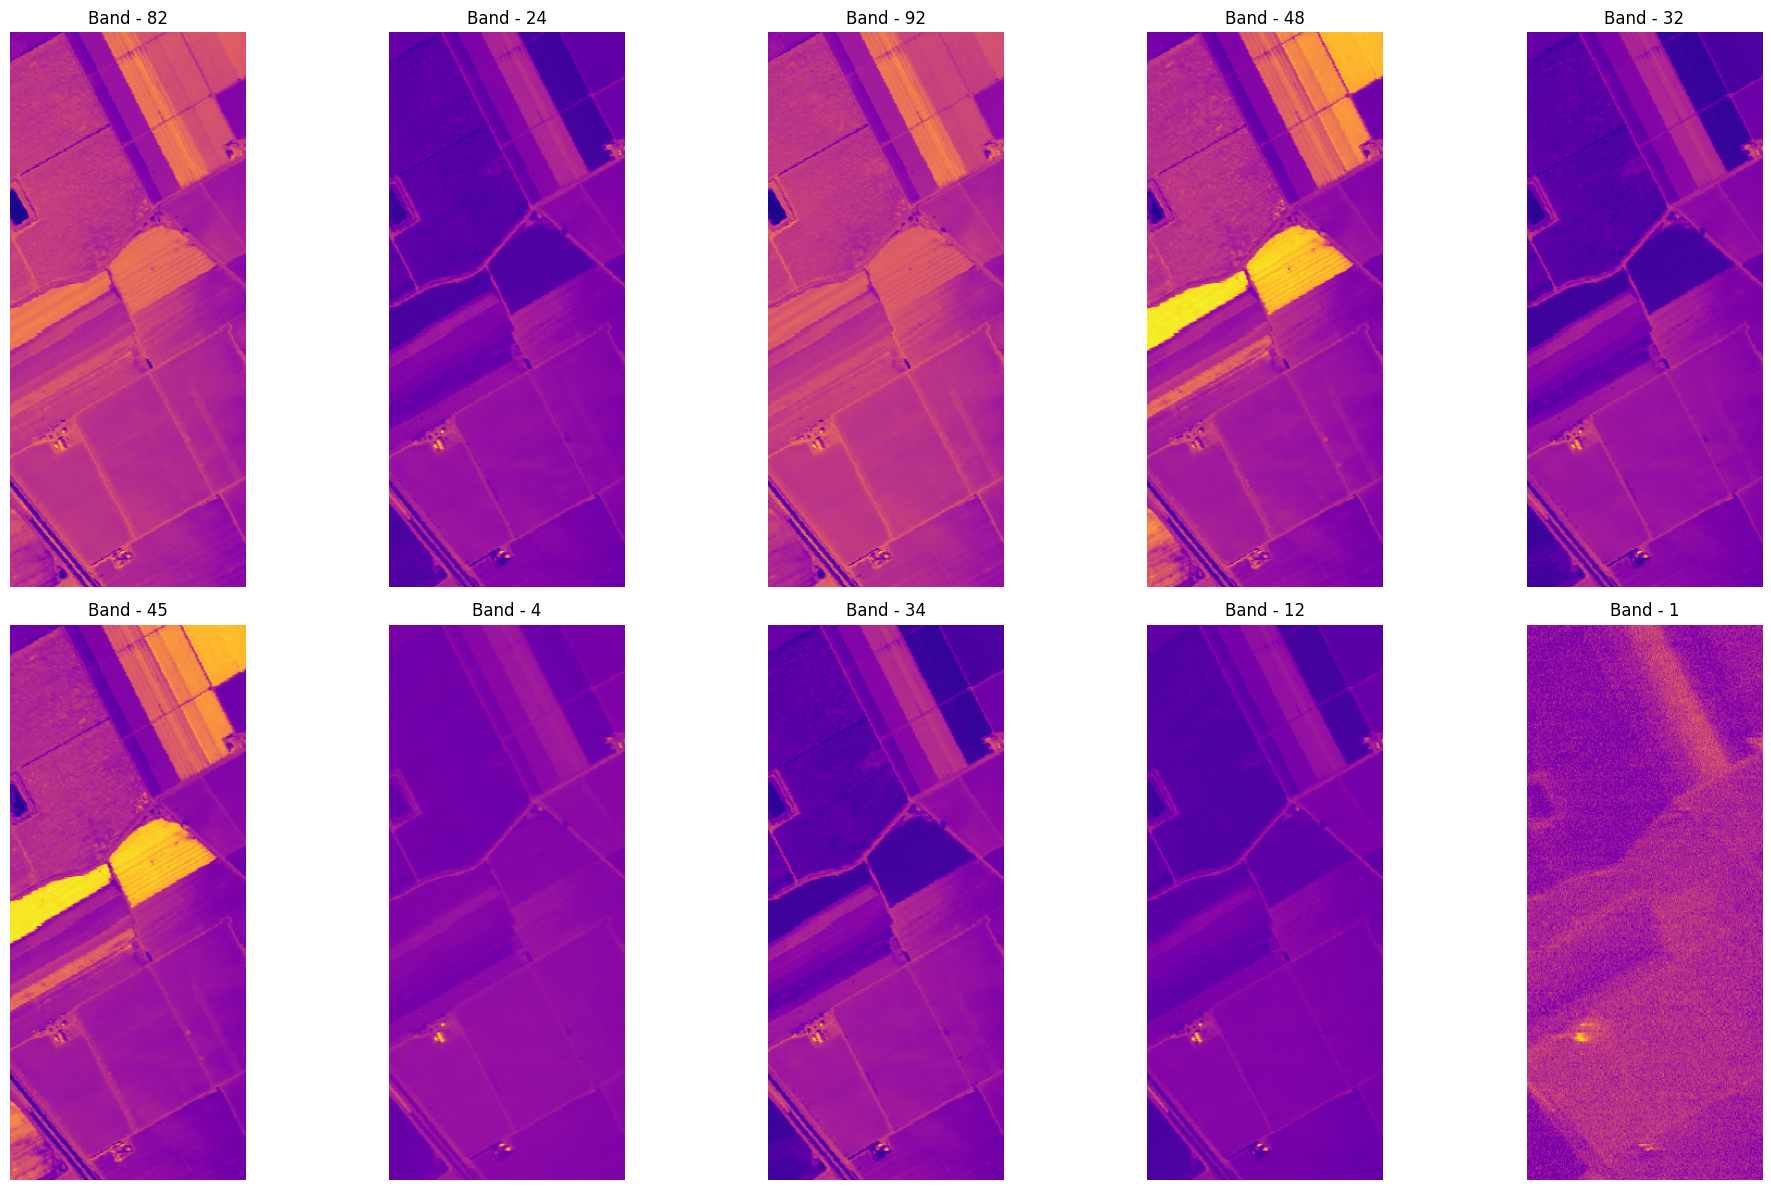

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='plasma')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


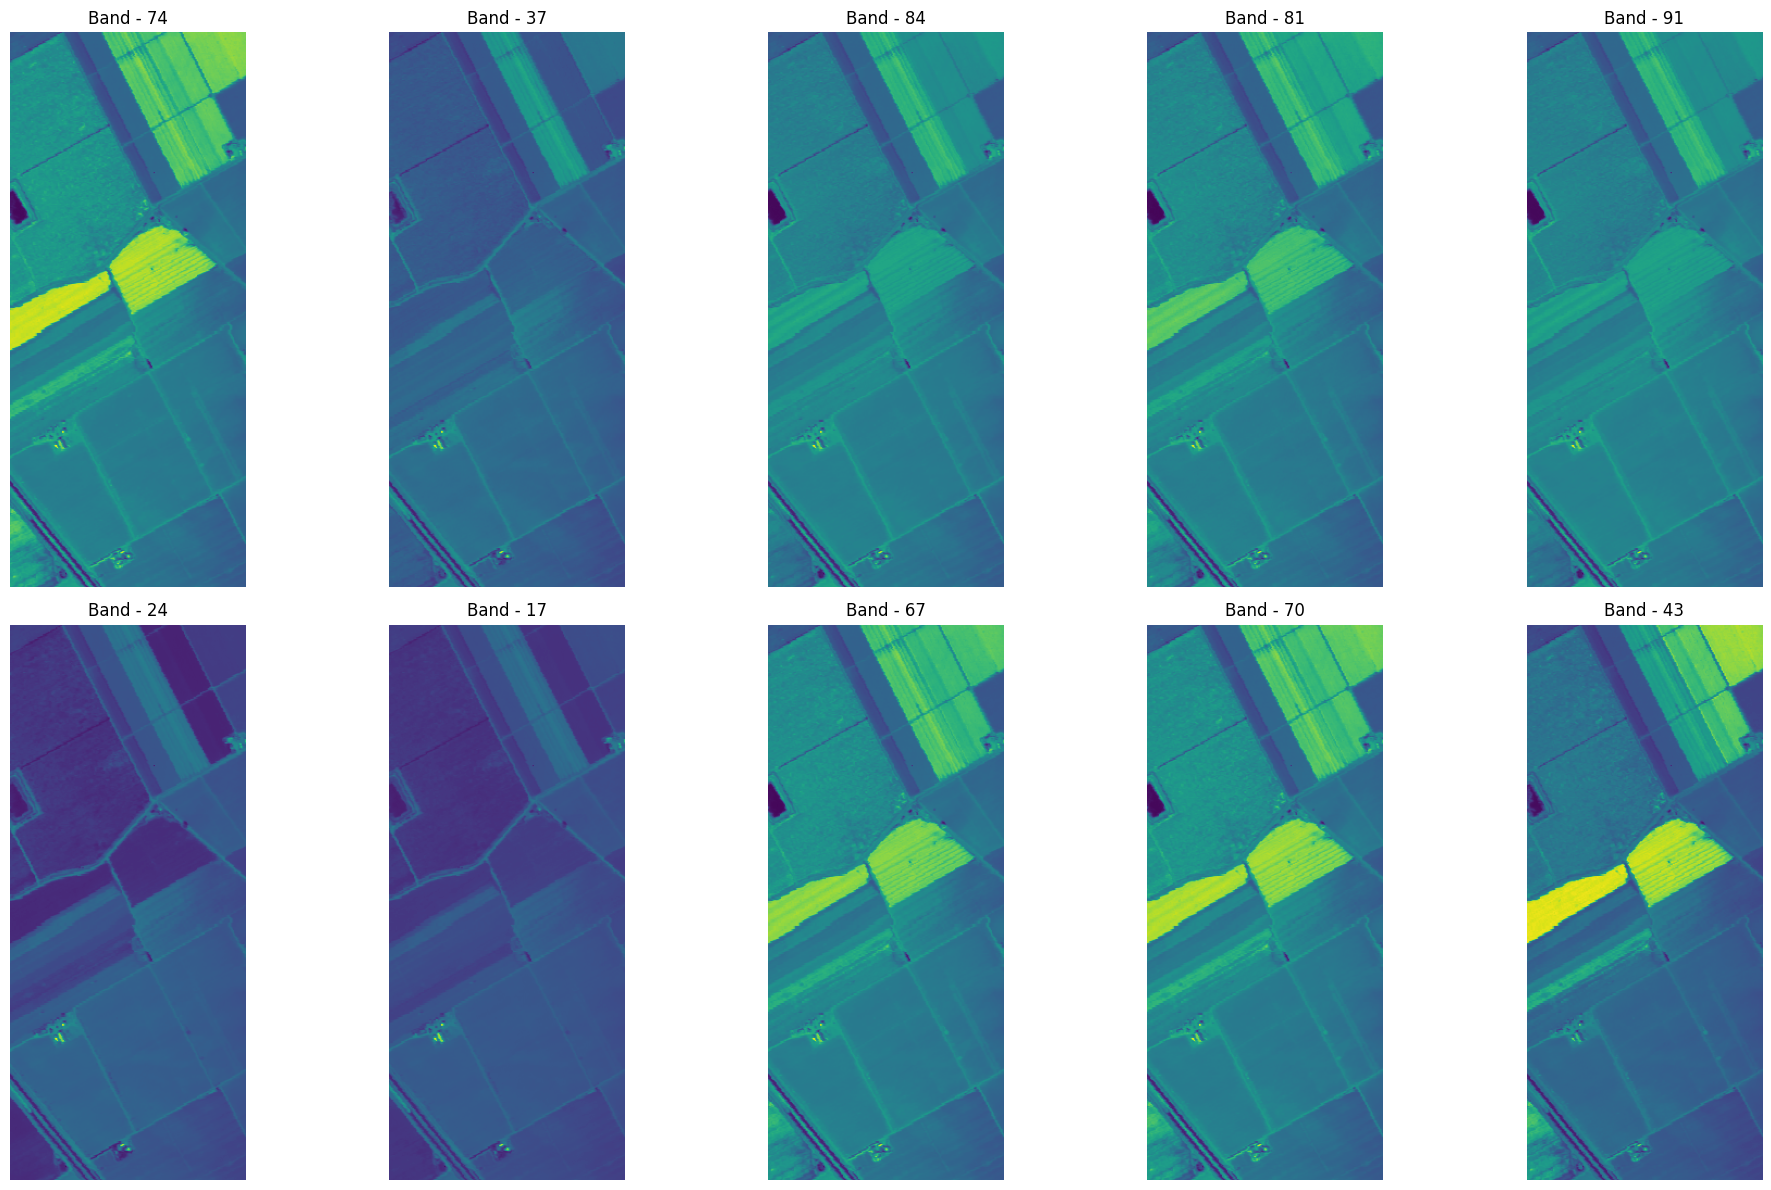

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='viridis')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


## RGB Composite Image

In [ ]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 49.4 MB/s eta 0:00:00


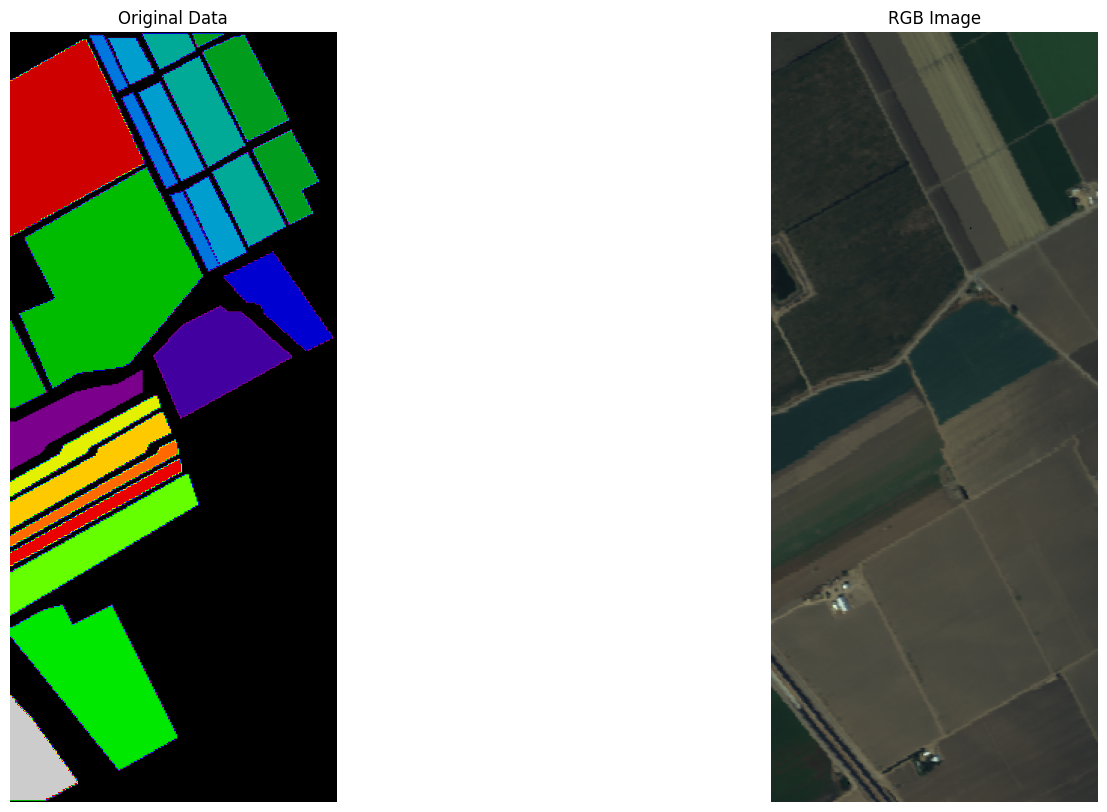

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import earthpy.plot as ep  # Assuming you are using earthpy for ep.plot_rgb

def plot_data(data):
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))

    # Plot the first image using plot_data
    axes[0].imshow(gt, cmap='nipy_spectral')
    axes[0].set_title('Original Data')
    axes[0].axis('off')


    # Plot the second image using ep.plot_rgb
    mdata = np.moveaxis(data, -1, 0)
    ep.plot_rgb(mdata, (29, 19, 9), ax=axes[1], figsize=(15, 15))
    axes[1].set_title('RGB Image')
    axes[1].axis('off')

    plt.show()

# Assuming gt and data are defined somewhere before this function call
plot_data(data)

## Scaling Data

In [ ]:
from keras.utils import to_categorical

In [ ]:
t_df = df[df['class']!=0]#as 0 represents land cover that is not associated with any class
ind = ['band'+str(i) for i in range(1, t_df.shape[-1])]
ind

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'band61',
 'band62',
 'band63',
 'band64',
 'band65',
 'band66',
 'band67',
 'band68',
 'band69',
 'band70',
 'band71',
 'band72',
 'band73',
 'band74',
 'band75',
 'band76',
 'band77',
 'band78',
 'band79',
 'band80',
 'band81',
 'band82',
 'band83',
 'band84',
 'band85',
 'band86',
 'band87',
 'band88',
 'band89',
 'band90',
 'band91',
 'band92

Each row in your representation likely corresponds to a pixel in an image, and each column corresponds to a specific spectral band.

In your example, you have 10,249 rows, which could mean that you have information for 10,249 pixels, and each pixel has spectral information from 200 bands.

In [ ]:
X = t_df.loc[:, ind]
X

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
305       369    558    787   1387   1765   1852   1820   2038   2372    2460   
306       441    474    787   1344   1706   1852   1800   2022   2328    2473   
307       441    558    787   1344   1706   1830   1781   2022   2343    2473   
308       441    558    787   1344   1735   1830   1800   2038   2386    2512   
309       441    474    787   1344   1735   1875   1858   2104   2430    2564   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
110689    299    483    540    921   1116   1148   1067   1136   1253    1256   
110690    299    316    540    879   1116   1125   1067   1136   1253    1269   
110691    299    232    474    836   1116   1125   1028   1119   1239    1269   
110692    299    316    540    836   1087   1125   1048   1119   1253    1243   
110693    228    400    474    879   1087   1148   1028   1119   1239    1256   

        ...  band195  band196  band197  band198  band199  band200  band201  \
305     ...      118      100      122       94       58       83       59   
306     ...      116      104      116       98       64       87       55   
307     ...      113      102      116       96       60       83       63   
308     ...      116       94      118      104       56       85       51   
309     ...      116      102      114       94       54       81       55   
...     ...      ...      ...      ...      ...      ...      ...      ...   
110689  ...       36       29       37       36       18       26       17   
110690  ...       30       29       35       26       16       24       15   
110691  ...       24       21       26       21       12       15       11   
110692  ...       24       25       28       26       14       28       17   
110693  ...       30       25       32       25       20       23       17   

        band202  band203  band204  
305          30        5       14  
306          32       11       25  
307          26       11       16  
308          32        7       12  
309          26        9       16  
...         ...      ...      ...  
110689        9        4       15  
110690        7       12        2  
110691        9        0        6  
110692        5        2        4  
110693       11        6        0  

[54129 rows x 204 columns]

In [ ]:

y = to_categorical(t_df.loc[:, 'class'])

X_scaled = minmax_scale(X, axis = 0);#rescaling the range of features to scale the range in [0, 1] or [−1, 1].

X_scaled.shape, y.shape

((54129, 204), (54129, 17))

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,#stratify=y argument ensures that the class distribution in y is preserved when splitting X and y into training and testing sets
                                                    test_size=0.20)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (43303, 204)
y_train: (43303, 17)
X_test: (10826, 204)
y_test: (10826, 17)


## Build CNN

In [ ]:
ip_shape = X_train[1].shape

n_outputs = y_train.shape[1]

X_train[1].ravel().shape

(204,)

In [ ]:
X_train.shape[0]

43303

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[0], 1)
X_test = X_test.reshape(-1, X_test.shape[0], 1)
X_train.shape

(43303, 204, 1)

In [ ]:
from keras.models import Sequential


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from kerastuner.tuners import RandomSearch
seed_value = 42
tf.random.set_seed(seed_value)

<ipython-input-27-8d208741b8ee>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
    model = Sequential(name='Indian_pinesCNN')

    # First set of layers with tunable hyperparameters
    model.add(Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(ip_shape[0], 1),
        name='Layer1'
    ))

    model.add(Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu',
        name='Layer2'
    ))

    # Adding hyperparameters to each layer
    model.add(Conv1D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu',
        name='Layer3'
    ))

    model.add(MaxPooling1D(
        pool_size=hp.Choice('maxpool_1_size', values=[2, 3]),
        name='MaxPooling_Layer1'
    ))

    model.add(Dropout(
        hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1),
        name='Dropout1'
    ))

    # Additional convolutional layers
    for i in range(4, 7):
        model.add(Conv1D(
            filters=hp.Int(f'conv_{i}_filter', min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice(f'conv_{i}_kernel', values=[3, 5]),
            activation='relu',
            name=f'Layer{i}'
        ))

    model.add(MaxPooling1D(
        pool_size=hp.Choice('maxpool_2_size', values=[2, 3]),
        name='MaxPooling_Layer2'
    ))

    model.add(Dropout(
        hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1),
        name='Dropout2'
    ))

    model.add(Flatten(name='Flatten'))

    # Dense layer with tunable units
    model.add(Dense(
        hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        name='DenseLayer'
    ))

    # Output layer
    model.add(Dense(
        n_outputs,
        activation='softmax',
        name='OutputLayer'
    ))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials
    executions_per_trial=2,  # Execute each model configuration multiple times
    directory='output',
    project_name='Indian_pinesCNN_tuning'
)

Reloading Tuner from output/Indian_pinesCNN_tuning/tuner0.json


In [ ]:
tuner.search(X_train, y_train,
             epochs=3,
             validation_split=0.1)

Trial 10 Complete [00h 01m 10s]
val_accuracy: 0.8691987991333008

Best val_accuracy So Far: 0.883052408695221
Total elapsed time: 00h 15m 44s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = build_model(best_hps)
model.summary()

Model: "Indian_pinesCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv1D)             (None, 200, 48)           288       
                                                                 
 Layer2 (Conv1D)             (None, 196, 64)           15424     
                                                                 
 Layer3 (Conv1D)             (None, 194, 80)           15440     
                                                                 
 MaxPooling_Layer1 (MaxPool  (None, 97, 80)            0         
 ing1D)                                                          
                                                                 
 Dropout1 (Dropout)          (None, 97, 80)            0         
                                                                 
 Layer4 (Conv1D)             (None, 93, 48)            19248     
                                                   

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=90,
                    validation_split=0.1)

Epoch 1/90
1218/1218 [==============================] - 10s 7ms/step - loss: 0.6582 - accuracy: 0.7372 - val_loss: 0.3633 - val_accuracy: 0.8379
Epoch 2/90
1218/1218 [==============================] - 8s 7ms/step - loss: 0.3841 - accuracy: 0.8324 - val_loss: 0.3289 - val_accuracy: 0.8575
Epoch 3/90
1218/1218 [==============================] - 8s 7ms/step - loss: 0.3438 - accuracy: 0.8498 - val_loss: 0.2773 - val_accuracy: 0.8792
Epoch 4/90
1218/1218 [==============================] - 8s 6ms/step - loss: 0.3201 - accuracy: 0.8615 - val_loss: 0.2808 - val_accuracy: 0.8732
Epoch 5/90
1218/1218 [==============================] - 8s 7ms/step - loss: 0.3011 - accuracy: 0.8672 - val_loss: 0.2726 - val_accuracy: 0.8836
Epoch 6/90
1218/1218 [==============================] - 8s 7ms/step - loss: 0.2889 - accuracy: 0.8714 - val_loss: 0.2422 - val_accuracy: 0.8961
Epoch 7/90
1218/1218 [==============================] - 8s 7ms/step - loss: 0.2773 - accuracy: 0.8761 - val_loss: 0.2493 - val_accuracy

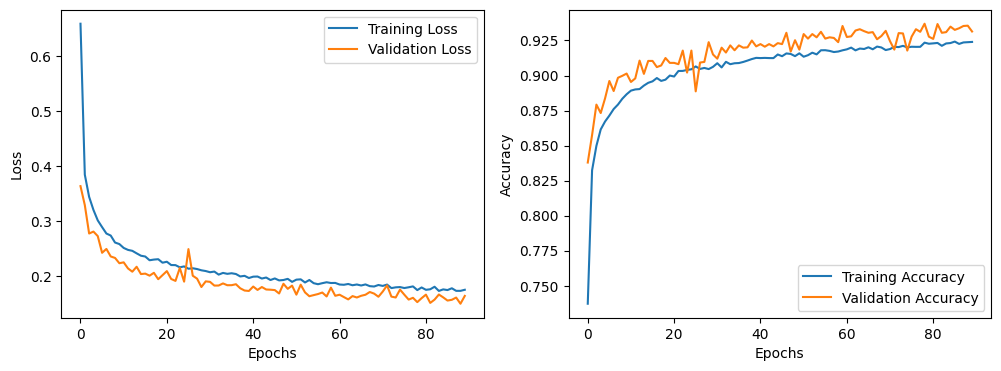

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()


In [ ]:
accuracy_l=[]
precision_l=[]
recall_l=[]

In [ ]:
print(history.history['accuracy'])

[0.7371702790260315, 0.8323925137519836, 0.8498152494430542, 0.8615416288375854, 0.8671610355377197, 0.8713948726654053, 0.8760905265808105, 0.8792979717254639, 0.8834291100502014, 0.8866365551948547, 0.8892281651496887, 0.8900749087333679, 0.890331506729126, 0.8928204774856567, 0.8947962522506714, 0.895848274230957, 0.8982089757919312, 0.8961561918258667, 0.8970543146133423, 0.8999794721603394, 0.899286687374115, 0.9032382369041443, 0.9032895565032959, 0.9040080308914185, 0.9044442176818848, 0.9064970016479492, 0.9047008156776428, 0.9054192900657654, 0.9045981764793396, 0.9061890840530396, 0.9087806344032288, 0.9057785272598267, 0.9097813963890076, 0.9080878496170044, 0.9087550044059753, 0.9089089632034302, 0.9096787571907043, 0.9106794595718384, 0.9117571711540222, 0.9126039147377014, 0.9124499559402466, 0.912578284740448, 0.9124499559402466, 0.9124243259429932, 0.9150159358978271, 0.9137842655181885, 0.9157600402832031, 0.9154008030891418, 0.9138355851173401, 0.9158369898796082, 0.9

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
85/85 [==============================] - 1s 6ms/step - loss: 0.1712 - accuracy: 0.9352
test loss, test acc: [0.17116853594779968, 0.9351561069488525]


In [ ]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:17])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 237ms/step
predictions shape: (17, 17)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (43303, 204, 1)
y_train shape: (43303, 17)
X_test shape: (10826, 204, 1)
y_test shape: (10826, 17)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is in one-hot encoded format
predictions = model.predict(X_test)
y_1d1 = np.argmax(predictions, axis=1)

# If y_test is in one-hot encoded format, convert it to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_classes, y_1d1, average='weighted')
recall = recall_score(y_true_classes, y_1d1, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


339/339 [==============================] - 1s 2ms/step
Precision: 0.9353780209207051
Recall: 0.9351561056715315


In [ ]:
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = [ '1. Alfalfa',
'2.Corn-notill',
'3.Corn-mintill',
'4.Corn',
'5.Grass-pasture',
'6.Grass-trees',
'7.Grass-pasture-mowed',
'8.Hay-windrowed',
'9.Oats',
'10.Soybean-notill',
'11.Soybean-mintill',
'12.Soybean-clean',
'13.Wheat',
'14.Woods',
'15.Buildings-Grass-Trees-Drives',
'16.Stone-Steel-Towers']))

339/339 [==============================] - 1s 4ms/step
                                 precision    recall  f1-score   support

                     1. Alfalfa       1.00      1.00      1.00       402
                  2.Corn-notill       1.00      1.00      1.00       744
                 3.Corn-mintill       1.00      0.99      0.99       399
                         4.Corn       0.99      1.00      0.99       278
                5.Grass-pasture       0.99      0.99      0.99       534
                  6.Grass-trees       1.00      1.00      1.00       795
          7.Grass-pasture-mowed       1.00      1.00      1.00       716
                8.Hay-windrowed       0.85      0.85      0.85      2259
                         9.Oats       1.00      1.00      1.00      1244
              10.Soybean-notill       0.97      0.99      0.98       643
             11.Soybean-mintill       0.99      1.00      0.99       212
               12.Soybean-clean       1.00      0.99      1.00      

SVM PART

In [ ]:
t_df = df[df['class']!=0]#as 0 represents land cover that is not associated with any class
ind = ['band'+str(i) for i in range(1, t_df.shape[-1])]
ind

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'band61',
 'band62',
 'band63',
 'band64',
 'band65',
 'band66',
 'band67',
 'band68',
 'band69',
 'band70',
 'band71',
 'band72',
 'band73',
 'band74',
 'band75',
 'band76',
 'band77',
 'band78',
 'band79',
 'band80',
 'band81',
 'band82',
 'band83',
 'band84',
 'band85',
 'band86',
 'band87',
 'band88',
 'band89',
 'band90',
 'band91',
 'band92

In [ ]:
X = t_df.loc[:, ind]
X

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
305       369    558    787   1387   1765   1852   1820   2038   2372    2460   
306       441    474    787   1344   1706   1852   1800   2022   2328    2473   
307       441    558    787   1344   1706   1830   1781   2022   2343    2473   
308       441    558    787   1344   1735   1830   1800   2038   2386    2512   
309       441    474    787   1344   1735   1875   1858   2104   2430    2564   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
110689    299    483    540    921   1116   1148   1067   1136   1253    1256   
110690    299    316    540    879   1116   1125   1067   1136   1253    1269   
110691    299    232    474    836   1116   1125   1028   1119   1239    1269   
110692    299    316    540    836   1087   1125   1048   1119   1253    1243   
110693    228    400    474    879   1087   1148   1028   1119   1239    1256   

        ...  band195  band196  band197  band198  band199  band200  band201  \
305     ...      118      100      122       94       58       83       59   
306     ...      116      104      116       98       64       87       55   
307     ...      113      102      116       96       60       83       63   
308     ...      116       94      118      104       56       85       51   
309     ...      116      102      114       94       54       81       55   
...     ...      ...      ...      ...      ...      ...      ...      ...   
110689  ...       36       29       37       36       18       26       17   
110690  ...       30       29       35       26       16       24       15   
110691  ...       24       21       26       21       12       15       11   
110692  ...       24       25       28       26       14       28       17   
110693  ...       30       25       32       25       20       23       17   

        band202  band203  band204  
305          30        5       14  
306          32       11       25  
307          26       11       16  
308          32        7       12  
309          26        9       16  
...         ...      ...      ...  
110689        9        4       15  
110690        7       12        2  
110691        9        0        6  
110692        5        2        4  
110693       11        6        0  

[54129 rows x 204 columns]

In [ ]:
y = to_categorical(t_df.loc[:, 'class'])

X_scaled = minmax_scale(X, axis = 0);#rescaling the range of features to scale the range in [0, 1] or [−1, 1].

X_scaled.shape, y.shape

((54129, 204), (54129, 17))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,#stratify=y argument ensures that the class distribution in y is preserved when splitting X and y into training and testing sets
                                                    test_size=0.20,random_state=42)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (43303, 204)
y_train: (43303, 17)
X_test: (10826, 204)
y_test: (10826, 17)


In [ ]:
y_1d = np.argmax(y_train, axis=1)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly',random_state = 0)
classifier.fit(X_train,y_1d)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred.shape

(10826,)

In [ ]:
y_1d1 = np.argmax(y_test, axis=1)

In [ ]:
y_1d = np.argmax(y_test, axis=1)
y_1d.shape

(10826,)

In [ ]:
accuracy=accuracy_score(y_1d1,y_pred)
y_pred1 = np.argmax(y_pred, axis=0)
# If y_test is in one-hot encoded format, convert it to class indices
#y_true_classes = np.argmax(y_test, axis=1)
# Calculate precision and recall
precision = precision_score(y_1d1, y_pred,average='weighted')
recall = recall_score(y_1d1, y_pred,average='weighted')
print("Accuracy = ",accuracy)
print("prevision = ",precision)
print("Recall = ",recall)

Accuracy =  0.9192684278588583
prevision =  0.9220319670362742
Recall =  0.9192684278588583


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_1d,y_pred)
print(cm)

[[ 401    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  745    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0  393    0    2    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  278    1    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    1    4  531    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0  792    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    1    0  712    3    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0 2079    0    4    0    0    0    0
   171    0]
 [   0    0    0    0    0    0    0    0 1241    0    0    0    0    0
     0    0]
 [   0    0    4    0    2    0    0    1    8  639    1    0    0    0
     1    0]
 [   0    0    1    0    2    0    0    0    0    1  205    4    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    1    0  384    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

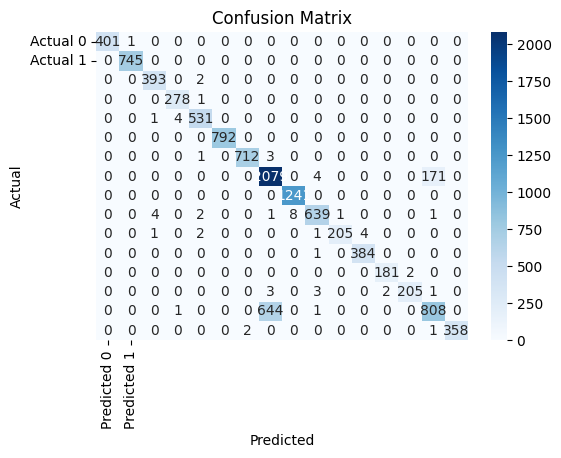

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
term_model = RandomForestClassifier(random_state=51)
term_model.fit(X_train,y_train)

RandomForestClassifier(random_state=51)

In [ ]:
y_pred = term_model.predict(X_test)
#accuracy=accuracy_score(y_1d,y_pred)
y_pred1 = np.argmax(y_pred, axis=0)
# If y_test is in one-hot encoded format, convert it to class indices
#y_true_classes = np.argmax(y_test, axis=1)
# Calculate precision and recall
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
print("Accuracy = ",accuracy)
print("prevision = ",precision)
print("Recall = ",recall)

0.9491040088675411
Accuracy =  0.9491040088675411
prevision =  0.9568888280036032
Recall =  0.9491040088675411


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
